In [378]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [379]:
# img = cv2.imread(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\testImages\conor3.jpg")
# img = cv2.imread(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\testImages\conor2.webp")
img = cv2.imread(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\testImages\conor4.jpg")

img.shape

(1250, 2500, 3)

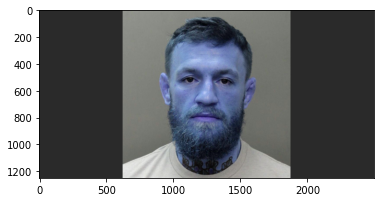

In [380]:
plt.imshow(img)

In [381]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1250, 2500)

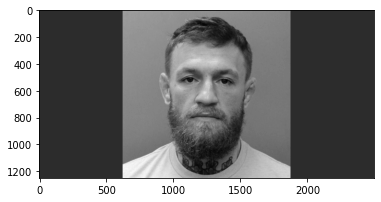

In [382]:
plt.imshow(gray, cmap = 'gray')

In [383]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[901, 232, 714, 714]])

In [384]:
(x, y, w, h) = faces[0]
x, y, w, h

(901, 232, 714, 714)

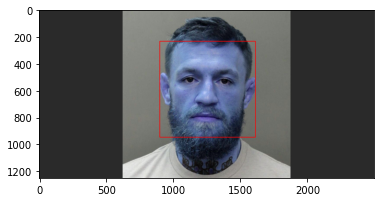

In [385]:
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)
plt.imshow(face_img)

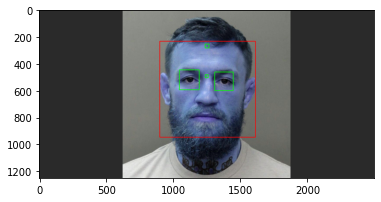

In [155]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x + h, y + w), (255, 0, 0), 4)
    roi_gray = gray[y : y + h, x : x + w]
    roi_color = face_img[y : y + h, x : x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 4)
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

# roi is region of interest

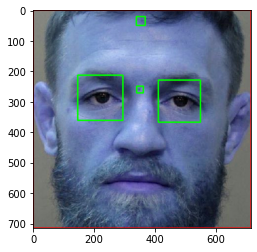

In [156]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [157]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            roi_gray = gray[y: y + h, x : x + w]
            roi_color = img[y: y + h, x : x + w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                    return roi_color

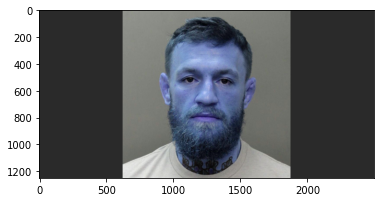

In [158]:
original_image = cv2.imread(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\testImages\conor4.jpg")
plt.imshow(original_image)

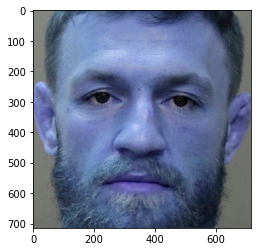

In [159]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\sarthak sanwal\ML_Project2_ImageClassification\Model\testImages\conor4.jpg")
plt.imshow(cropped_image)

In [160]:
path_to_data = "./DataSets"
path_to_cr_data = "./DataSets/cropped/"

In [161]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [162]:
img_dirs

['./DataSets\\anderson silva - Google Search',
 './DataSets\\conor mcgregor - Google Search',
 './DataSets\\dustin poirier - Google Search',
 './DataSets\\george st pierre - Google Search',
 './DataSets\\jon jones - Google Search',
 './DataSets\\khabib nurmagomedov - Google Search']

In [163]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [238]:
cropped_image_dirs = []
fighter_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    fighter_name = img_dir.split('\\')[-1]
    print(fighter_name)
    
    fighter_file_name_dict[fighter_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + fighter_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder: ", cropped_folder)
            cropped_file_name = fighter_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            fighter_file_name_dict[fighter_name].append(cropped_file_path)
            count += 1

anderson silva - Google Search
generating cropped images in folder:  ./DataSets/cropped/anderson silva - Google Search
conor mcgregor - Google Search
generating cropped images in folder:  ./DataSets/cropped/conor mcgregor - Google Search
dustin poirier - Google Search
generating cropped images in folder:  ./DataSets/cropped/dustin poirier - Google Search
george st pierre - Google Search
generating cropped images in folder:  ./DataSets/cropped/george st pierre - Google Search
jon jones - Google Search
generating cropped images in folder:  ./DataSets/cropped/jon jones - Google Search
khabib nurmagomedov - Google Search
generating cropped images in folder:  ./DataSets/cropped/khabib nurmagomedov - Google Search


In [239]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

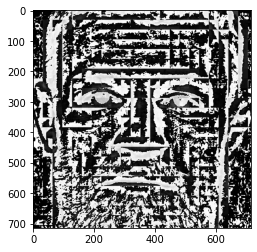

In [240]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [272]:
fighter_file_name_dict

{'anderson silva - Google Search': ['./DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search1.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search10.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search11.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search12.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search13.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search14.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search15.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search16.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search17.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search18.png',
  './DataSets/cropped/anderson silva 

In [274]:
fighter_file_name_dict = {}
for img_dir in cropped_image_dirs:
    fighter_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    fighter_file_name_dict[fighter_name] = file_list
fighter_file_name_dict

{'anderson silva - Google Search': ['./DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search1.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search10.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search13.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search14.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search16.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search18.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search19.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search20.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search23.png',
  './DataSets/cropped/anderson silva - Google Search\\anderson silva - Google Search25.png',
  './DataSets/cropped/anderson silva 

In [275]:
class_dict = {}
count = 0
for fighter_name in fighter_file_name_dict.keys():
    class_dict[fighter_name] = count
    count = count + 1
class_dict

{'anderson silva - Google Search': 0,
 'conor mcgregor - Google Search': 1,
 'dustin poirier - Google Search': 2,
 'george st pierre - Google Search': 3,
 'jon jones - Google Search': 4,
 'khabib nurmagomedov - Google Search': 5}

In [276]:
X = []
y = []

for fighter_name, training_file in fighter_file_name_dict.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))
        X.append(combined_img)
        y.append(fighter_name)

In [277]:
len(X)

201

In [278]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(201, 4096)

In [279]:
X[0]

array([177., 176., 186., ..., 245., 249., 244.])

In [280]:
len(y)

201

In [281]:
y

['anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'anderson silva - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - Google Search',
 'conor mcgregor - G

Training the Model

In [282]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5609756097560976

In [365]:
print(classification_report(y_test, pipe.predict(X_test)))

                                     precision    recall  f1-score   support

     anderson silva - Google Search       1.00      0.17      0.29         6
     conor mcgregor - Google Search       0.50      0.67      0.57         6
     dustin poirier - Google Search       0.75      0.60      0.67         5
   george st pierre - Google Search       0.50      0.70      0.58        10
          jon jones - Google Search       0.55      0.86      0.67         7
khabib nurmagomedov - Google Search       0.67      0.29      0.40         7

                           accuracy                           0.56        41
                          macro avg       0.66      0.55      0.53        41
                       weighted avg       0.64      0.56      0.53        41



In [366]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [367]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [368]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.675,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.550,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.675,{'logisticregression__C': 1}


In [369]:
best_estimators['svm'].score(X_test, y_test)

0.6097560975609756

In [370]:
best_estimators['random_forest'].score(X_test, y_test)

0.36585365853658536

In [371]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6341463414634146

In [372]:
best_clf = best_estimators['svm']

In [373]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 1, 1, 1, 2, 0],
       [0, 5, 0, 0, 1, 0],
       [0, 0, 3, 1, 0, 1],
       [1, 3, 0, 6, 0, 0],
       [0, 0, 0, 0, 7, 0],
       [0, 1, 0, 2, 1, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

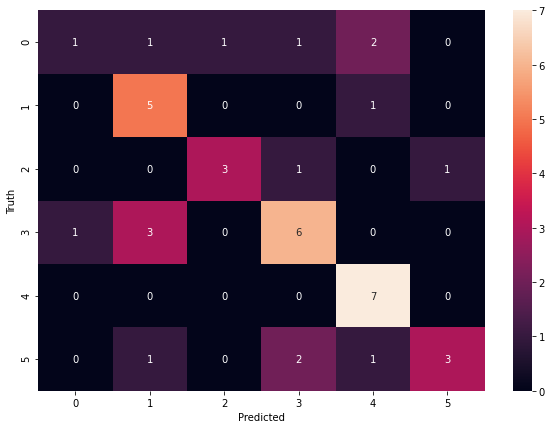

In [374]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [375]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [377]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))